In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hyper = pd.read_csv(r"D:\projects\multiple-disease-prediction\datasets\hypertension.csv")

In [3]:
hyper

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [5]:
hyper.shape

(4240, 13)

In [6]:
hyper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [7]:
hyper.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [11]:
missing_data=hyper.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/hyper.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64
The total percentage of missing data is 12.74%


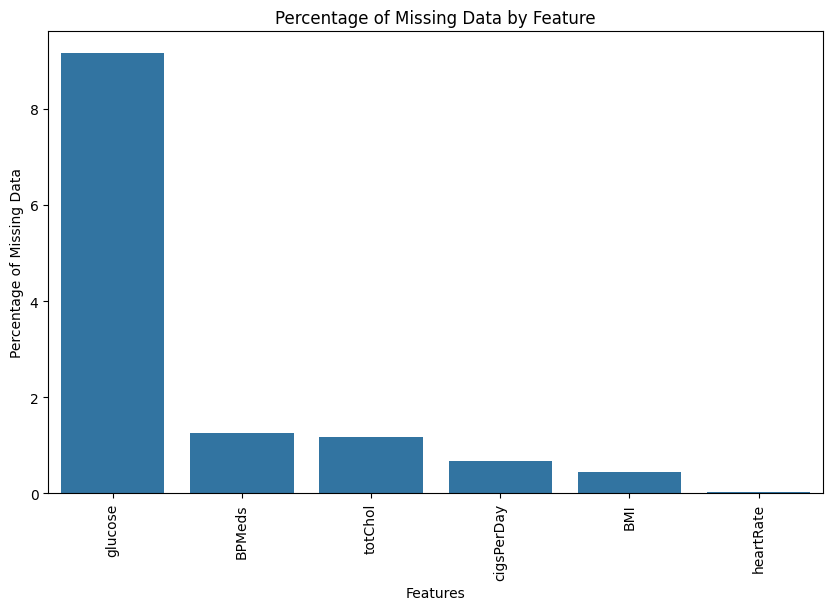

In [22]:
missing_data = hyper.isnull().sum()  # This will be a Series

# Convert the Series to a DataFrame and name the column as 'Total'
missing_data = missing_data[missing_data > 0].to_frame(name='Total')

# Add a new column 'Percentage' to the DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(hyper)) * 100

# Sort the data based on the percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y='Percentage', data=missing_data)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Data by Feature')
plt.ylabel('Percentage of Missing Data')
plt.xlabel('Features')
plt.show()

In [23]:
hyper.dropna(axis=0,inplace=True)

In [24]:
missing_data=hyper.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/hyper.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64
The total percentage of missing data is 0.0%


In [25]:
hyper.shape


(3751, 13)

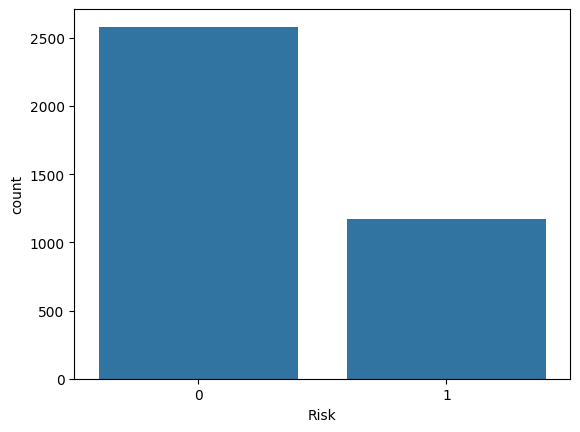

There are 2581 patients without risk of Hypertension and 1170 patients with risk of Hypertension


In [27]:
sns.countplot(x="Risk",data=hyper)
plt.show()
cases=hyper.Risk.value_counts()
print(f"There are {cases[0]} patients without risk of Hypertension and {cases[1]} patients with risk of Hypertension")

In [28]:
hyper["age"].unique

<bound method Series.unique of 0       39
1       46
2       48
3       61
4       46
        ..
4233    50
4234    51
4237    52
4238    40
4239    39
Name: age, Length: 3751, dtype: int64>

C:\Users\sunnr\AppData\Local\Temp\ipykernel_16220\3523537650.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hyper.hist(ax = ax)


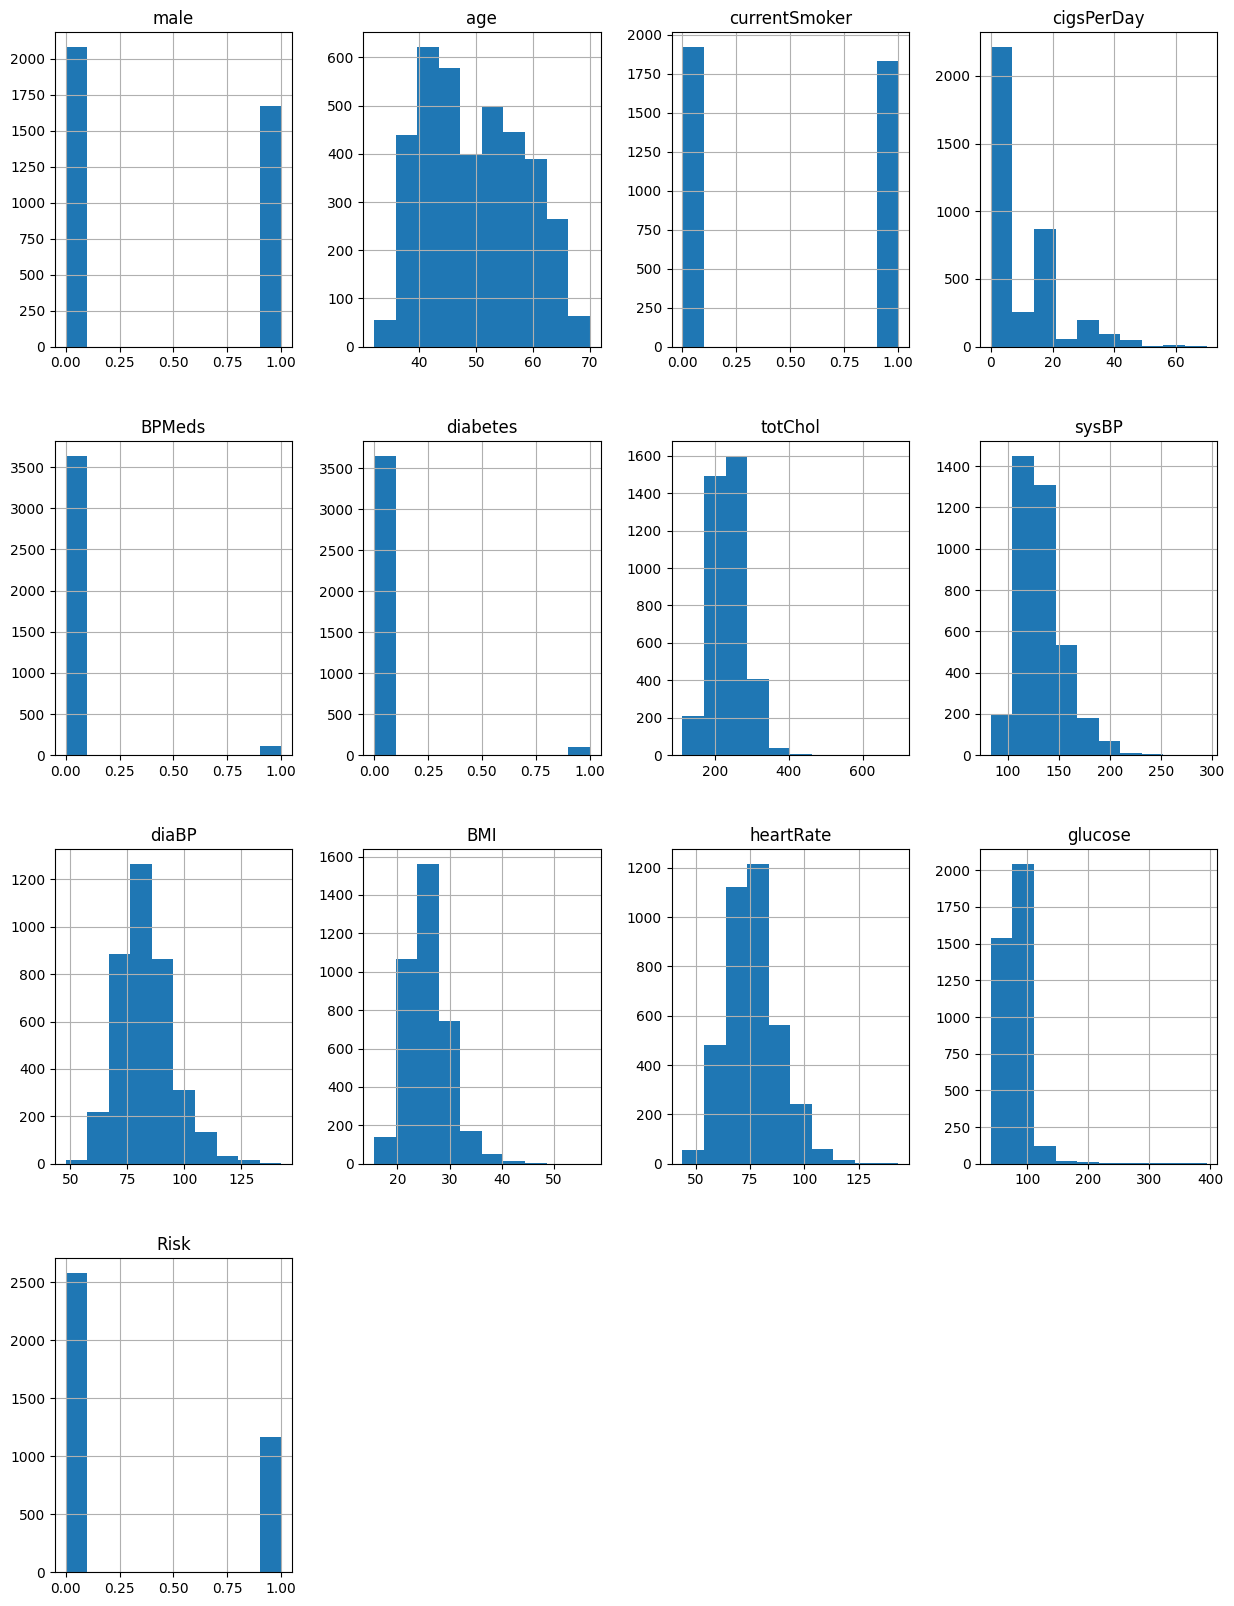

In [29]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
hyper.hist(ax = ax)
plt.show()

In [30]:
cate_val=[]
cont_val=[]

for column in hyper.columns:
    if hyper[column].nunique() <=10:
        cate_val.append(column)
    else:
      cont_val.append(column)

In [31]:
cate_val

['male', 'currentSmoker', 'BPMeds', 'diabetes', 'Risk']

In [32]:
cont_val


['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

C:\Users\sunnr\AppData\Local\Temp\ipykernel_16220\62683904.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hyper[col], ax=axes[index1][index2]);
C:\Users\sunnr\AppData\Local\Temp\ipykernel_16220\62683904.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hyper[col], ax=axes[index1][index2])

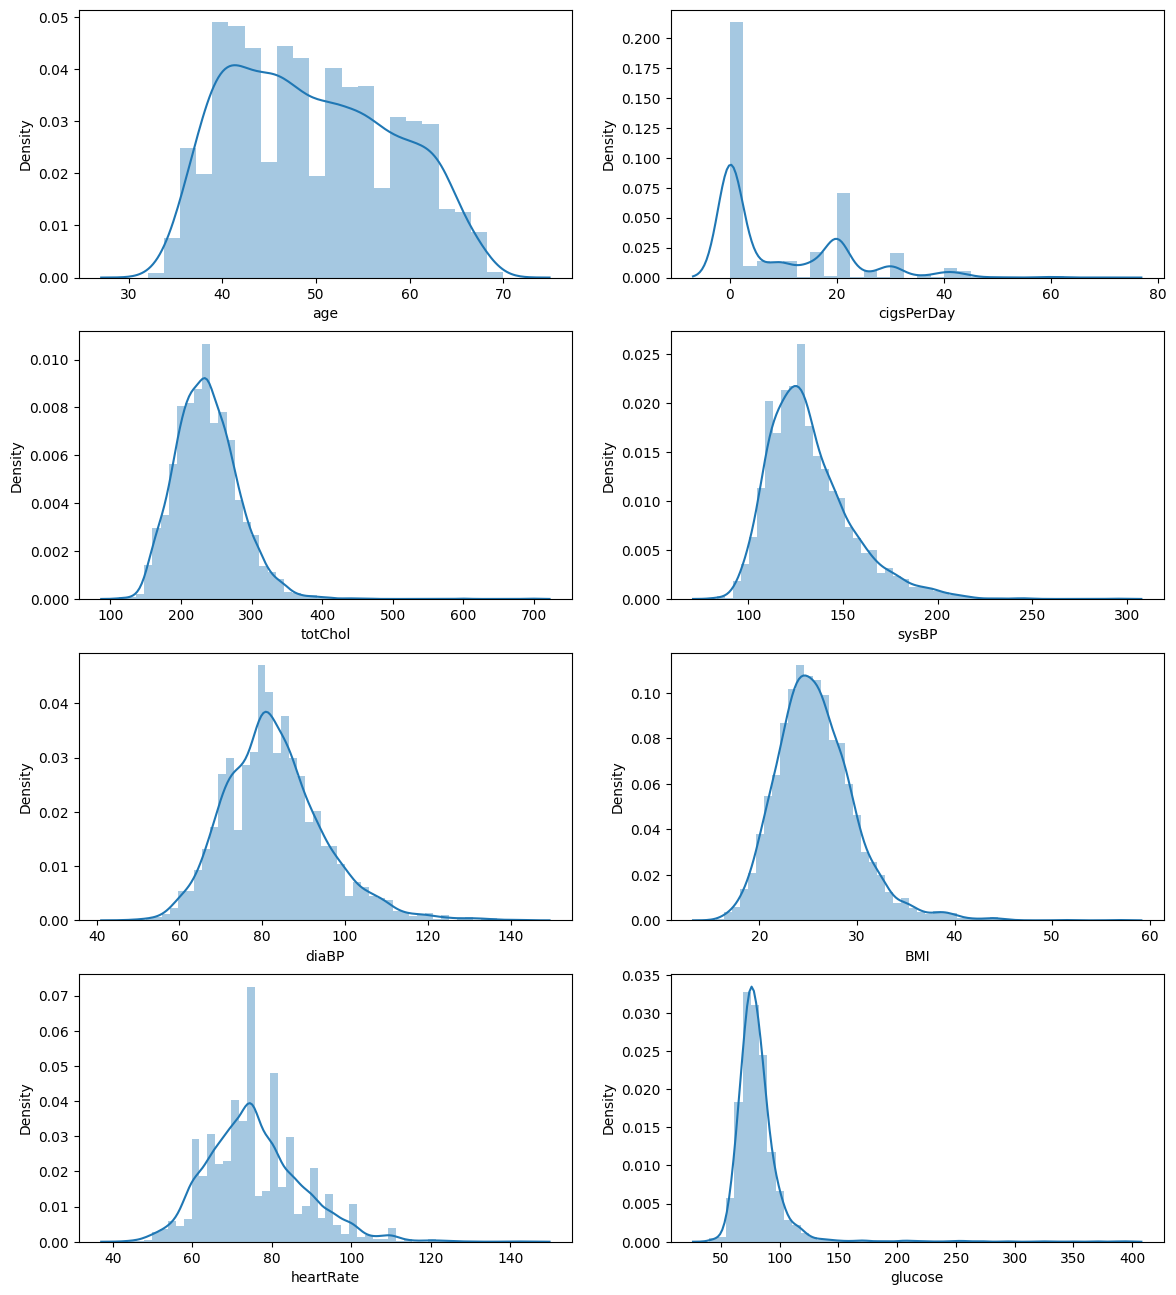

In [34]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in cont_val:
    sns.distplot(hyper[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

C:\Users\sunnr\AppData\Local\Temp\ipykernel_16220\3711562102.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hyper[hyper['Risk'] == 0]['age'], label='No risk of Hypertension')
C:\Users\sunnr\AppData\Local\Temp\ipykernel_16220\3711562102.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hyp

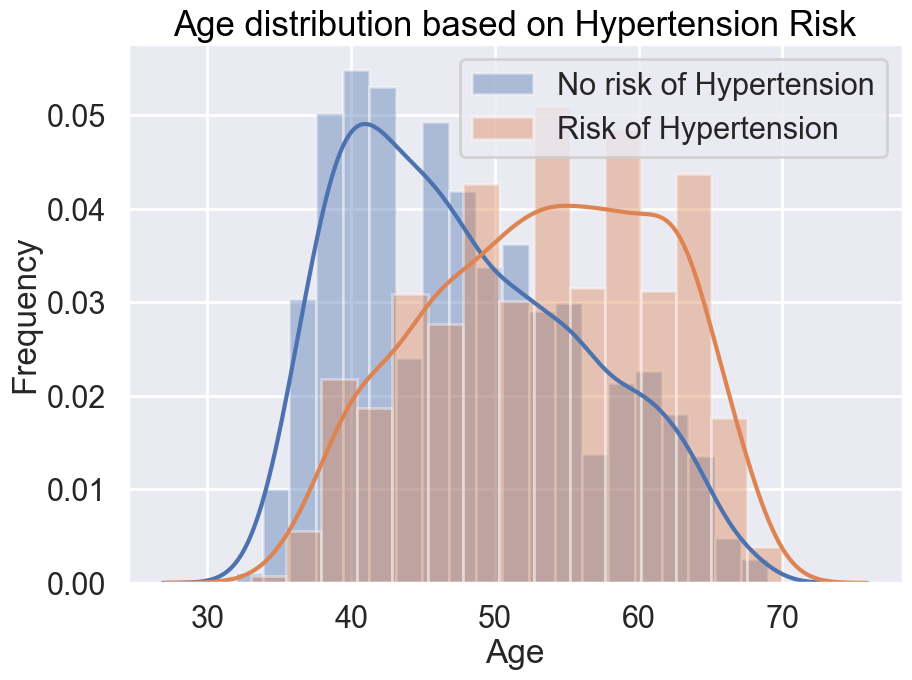

In [35]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on Hypertension Risk', color="Black",fontsize=25)

sns.distplot(hyper[hyper['Risk'] == 0]['age'], label='No risk of Hypertension')
sns.distplot(hyper[hyper['Risk'] == 1]['age'], label = 'Risk of Hypertension')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

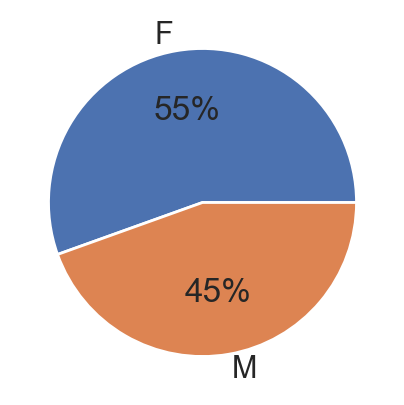

In [36]:
gender = ['F','M']

gender_data = pd.Series(hyper['male']).value_counts()

plt.figure(figsize=(5,5))

plt.pie(gender_data,labels=gender,autopct='%.0f%%')

plt.show()

In [37]:
hyper.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.311917
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.463338
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [63]:
hyper.male.unique()

array([1, 0])

In [64]:
hyper.currentSmoker.unique()

array([0, 1])

In [38]:
hyper["Risk"].value_counts(normalize=True)

Risk
0    0.688083
1    0.311917
Name: proportion, dtype: float64

In [39]:
cate_val=hyper[['male','currentSmoker','BPMeds','diabetes']]

In [40]:
cate_val


,male,currentSmoker,BPMeds,diabetes
0,1,0,0.0,0
1,0,0,0.0,0
2,1,1,0.0,0
3,0,1,0.0,0
4,0,1,0.0,0
...,...,...,...,...
4233,1,1,0.0,0
4234,1,1,0.0,0
4237,0,0,0.0,0
4238,1,0,0.0,0


In [41]:
hyper

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [42]:
hyper.isna().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64

In [43]:
X = hyper.drop(columns='Risk', axis=1)
Y = hyper['Risk']

In [44]:
X

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0


In [45]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    1
4239    0
Name: Risk, Length: 3751, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(3751, 12) (3000, 12) (751, 12)


In [48]:
model = SVC()

In [49]:
model.fit(X_train, Y_train)

SVC()

In [50]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [51]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.879


In [52]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [53]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8868175765645806


In [54]:
hyper.sample()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
1591,0,60,0,0.0,0.0,0,170.0,146.0,89.0,32.41,68.0,81.0,1


In [57]:
hyper.sample()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
3796,0,59,0,0.0,0.0,0,254.0,116.0,71.0,25.48,75.0,98.0,0


In [58]:
input_data = (0,59,0,0.0,0.0,0,254.0,116.0,71.0,25.48,75.0,98.0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('This Person does not have a hypertension')
else:
  print('This Person has hypertension')

[0]
This Person does not have a hypertension


d:\RaviKiran\ana\envs\multi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [59]:
import pickle

In [60]:
filename = 'hyper_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [61]:
loaded_model = pickle.load(open('hyper_model.sav', 'rb'))

In [62]:

for column in X.columns:
  print(column)

male
age
currentSmoker
cigsPerDay
BPMeds
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
